In [44]:
!pip install scipy

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [22]:
df = pd.read_csv("apple_products.csv")
print(df.head())

                               Product Name  \
0         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2      APPLE iPhone 8 Plus (Silver, 256 GB)   
3           APPLE iPhone 8 (Silver, 256 GB)   
4             APPLE iPhone 8 (Gold, 256 GB)   

                                         Product URL  Brand  Sale Price  \
0  https://www.flipkart.com/apple-iphone-8-plus-g...  Apple       49900   
1  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
2  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
3  https://www.flipkart.com/apple-iphone-8-silver...  Apple       77000   
4  https://www.flipkart.com/apple-iphone-8-gold-2...  Apple       77000   

     Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
0  49900                    0               3431                356   
1  84900                    0               3431                356   
2  84900                    0               3431     

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [24]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [25]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [16]:
#Question1: What are the top 10 highest -rated iphones on Flipkart in India?

In [28]:
# Filtering rows where 'Product Name' contains 'iPhone'
df_iphones = df[df['Product Name'].str.contains('iPhone', case=False, na=False)]

# Converting 'Star Rating' to numeric, coercing errors
df_iphones['Star Rating'] = pd.to_numeric(df_iphones['Star Rating'], errors='coerce')

# Droping rows with missing 'Star Rating'
df_iphones = df_iphones.dropna(subset=['Star Rating'])

In [29]:
# Sorting by 'Star Rating' descending and select top 10
top_10_iphones = df_iphones.sort_values(by='Star Rating', ascending=False).head(10)

# Displaying relevant columns
top_10_iphones[['Product Name', 'Star Rating', 'Number Of Ratings', 'Sale Price']]

,Product Name,Star Rating,Number Of Ratings,Sale Price
15,"APPLE iPhone 11 Pro Max (Gold, 64 GB)",4.7,1078,117100
20,"APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)",4.7,1078,117100
17,"APPLE iPhone 11 Pro Max (Space Grey, 64 GB)",4.7,1078,117100
16,"APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)",4.7,1078,131900
14,"APPLE iPhone 11 Pro Max (Gold, 256 GB)",4.7,1078,131900
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",4.6,3431,49900
12,"Apple iPhone XR (Black, 128 GB) (Includes EarP...",4.6,79512,41999
11,"Apple iPhone XR (Coral, 128 GB) (Includes EarP...",4.6,79582,41999
9,"Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includ...",4.6,79512,41999
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",4.6,3431,84900


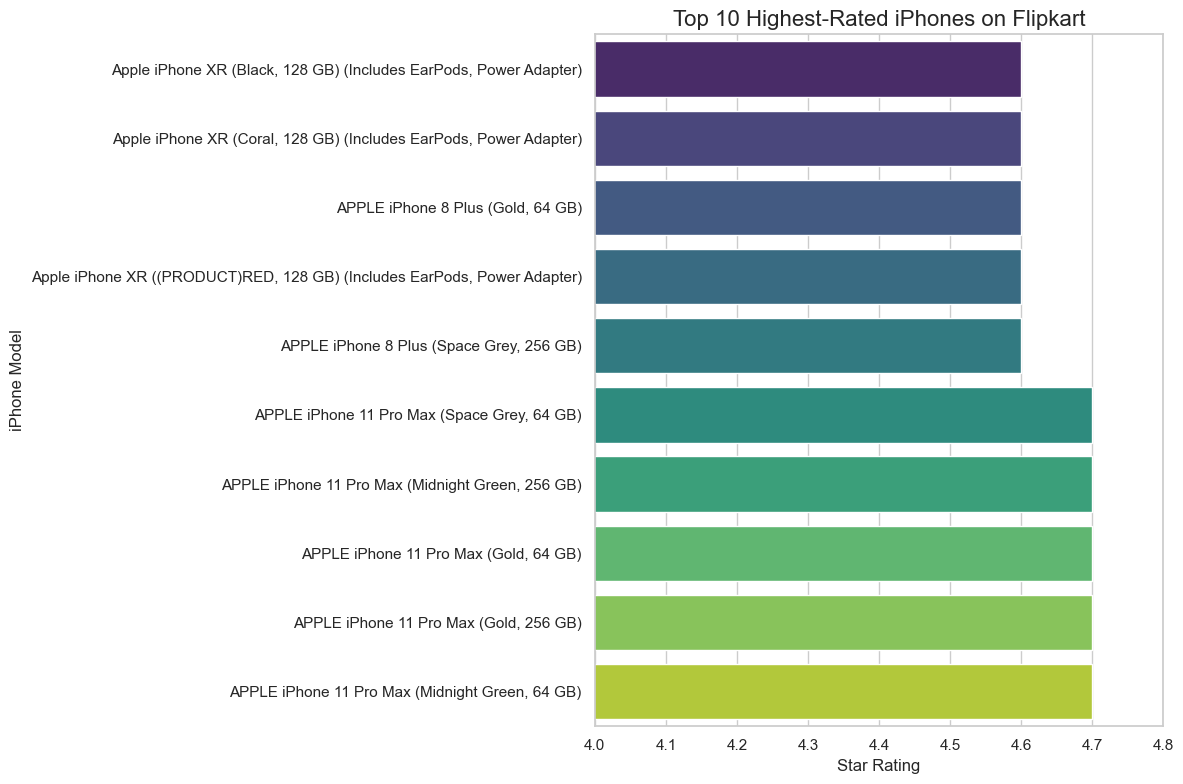

In [49]:
# Setting style
sns.set(style="whitegrid")

# Sorting the data for a clean plot
top_10_iphones = top_10_iphones.sort_values(by='Star Rating', ascending=True)

# Setting figure size
plt.figure(figsize=(12, 8))

# Creating barplot with Product Name as hue to apply palette correctly
sns.barplot(
    x='Star Rating',
    y='Product Name',
    data=top_10_iphones,
    hue='Product Name',     # assign hue to remove FutureWarning
    dodge=False,
    palette='viridis',
    legend=False            # disable legend since y-axis already shows names
)

# Titles and labels
plt.title('Top 10 Highest-Rated iPhones on Flipkart', fontsize=16)
plt.xlabel('Star Rating')
plt.ylabel('iPhone Model')
plt.xlim(4., 4.8)  # Limit the x-axis range

#Saving plot:
plt.tight_layout()
plt.savefig('top_rated_iphones.png', dpi=300, bbox_inches='tight')  # Save the plot
plt.show()

In [37]:
#Question2. How many ratings do the highest-rated iphones on Flipkart have?

In [38]:
# Filtering iPhones only
df_iphones = df[df['Product Name'].str.contains('iPhone', case=False, na=False)]

# Finding the highest star rating
max_rating = df_iphones['Star Rating'].max()

# Filtering iPhones with the highest star rating
highest_rated_iphones = df_iphones[df_iphones['Star Rating'] == max_rating]

# Displaying number of ratings for those
highest_rated_iphones[['Product Name', 'Star Rating', 'Number Of Ratings']]

,Product Name,Star Rating,Number Of Ratings
14,"APPLE iPhone 11 Pro Max (Gold, 256 GB)",4.7,1078
15,"APPLE iPhone 11 Pro Max (Gold, 64 GB)",4.7,1078
16,"APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)",4.7,1078
17,"APPLE iPhone 11 Pro Max (Space Grey, 64 GB)",4.7,1078
20,"APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)",4.7,1078


In [39]:
#Question3: Which iphone has the highest number of reviews on Flipkart?

In [40]:
# Filtering rows where product name contains 'iPhone'
df_iphones = df[df['Product Name'].str.contains('iPhone', case=False, na=False)]

# Finding the iPhone with the highest number of reviews
most_reviewed_iphone = df_iphones.loc[df_iphones['Number Of Reviews'].idxmax()]

# Displaying result
most_reviewed_iphone[['Product Name', 'Number Of Reviews', 'Star Rating']]

Product Name         Apple iPhone SE (White, 256 GB) (Includes EarP...
Number Of Reviews                                                 8161
Star Rating                                                        4.5
Name: 23, dtype: object

In [41]:
#Question4: What is the relationship between the sale price of iphones and the number of ratings on Flipkart?

In [46]:
# Filtering for iPhones
df_iphones = df[df['Product Name'].str.contains('iPhone', case=False, na=False)]

# Droping NaNs for clean correlation analysis
iphone_data = df_iphones[['Sale Price', 'Number Of Ratings']].dropna()

# Calculating Pearson correlation
correlation, p_value = pearsonr(iphone_data['Sale Price'], iphone_data['Number Of Ratings'])

print(f"Pearson Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation: -0.70
P-value: 0.0000


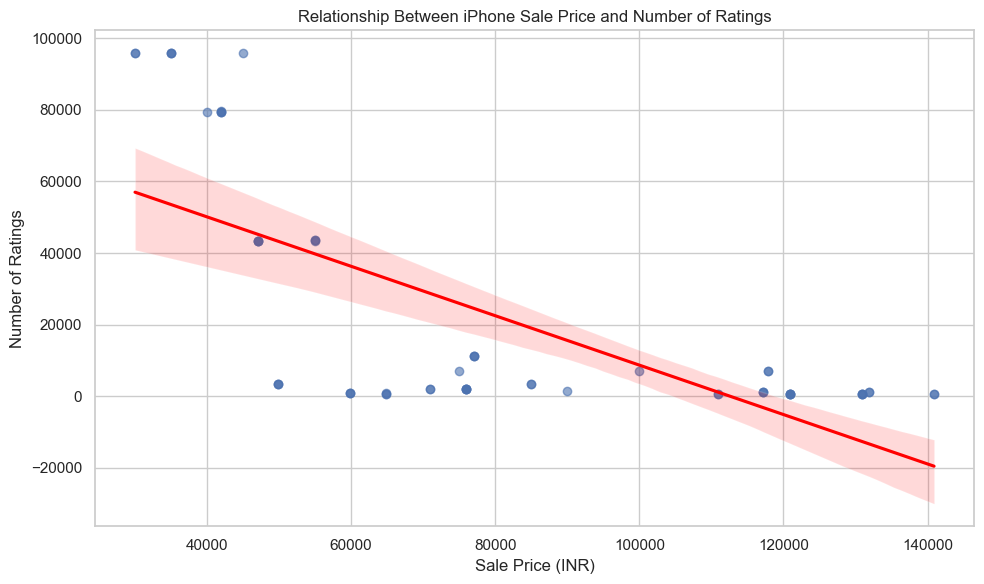

In [48]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=iphone_data,
    x='Sale Price',
    y='Number Of Ratings',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title('Relationship Between iPhone Sale Price and Number of Ratings')
plt.xlabel('Sale Price (INR)')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.savefig('saleprice_vs_ratings.png', dpi=300, bbox_inches='tight')  # Save plot here
plt.show()

In [50]:
#Question5: What is the relationship between the discount percentage and the number of ratings of iphones on Flipkart?

In [51]:
# Filtering only iPhones
df_iphones = df[df['Product Name'].str.contains('iPhone', case=False, na=False)]

# Droping NaN rows for clean correlation
iphone_data = df_iphones[['Discount Percentage', 'Number Of Ratings']].dropna()

# Calculating Pearson correlation
correlation, p_value = pearsonr(iphone_data['Discount Percentage'], iphone_data['Number Of Ratings'])

print(f"Pearson Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation: 0.68
P-value: 0.0000


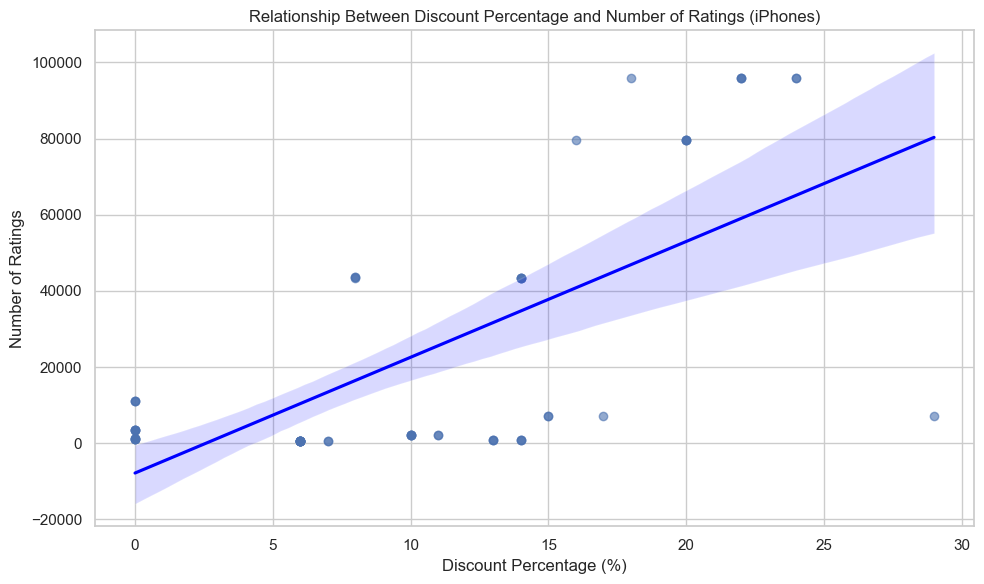

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=iphone_data,
    x='Discount Percentage',
    y='Number Of Ratings',
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'blue'}
)

plt.title('Relationship Between Discount Percentage and Number of Ratings (iPhones)')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Number of Ratings')

plt.tight_layout()
plt.savefig('discount_vs_ratings.png', dpi=300, bbox_inches='tight')  # Save plot image
plt.show()

In [53]:
#Question6: Can you figure out the least expensive and the most expensive iphones in the Indian market, along with all their specifications?

In [54]:
# Filtering only iPhones
df_iphones = df[df['Product Name'].str.contains('iPhone', case=False, na=False)]

# Finding index of least expensive iPhone
min_price_idx = df_iphones['Sale Price'].idxmin()

# Finding index of most expensive iPhone
max_price_idx = df_iphones['Sale Price'].idxmax()

# Getting full specs of least expensive iPhone
least_expensive_iphone = df_iphones.loc[min_price_idx]

# Getting full specs of most expensive iPhone
most_expensive_iphone = df_iphones.loc[max_price_idx]

# Displaying results
print("Least Expensive iPhone:\n", least_expensive_iphone.to_frame().T)
print("\nMost Expensive iPhone:\n", most_expensive_iphone.to_frame().T)

Least Expensive iPhone:
                       Product Name  \
52  APPLE iPhone SE (White, 64 GB)   

                                          Product URL  Brand Sale Price  \
52  https://www.flipkart.com/apple-iphone-se-white...  Apple      29999   

      Mrp Discount Percentage Number Of Ratings Number Of Reviews  \
52  39900                  24             95807              8154   

                 Upc Star Rating   Ram  
52  MOBFWQ6BGWDVGF3E         4.5  2 GB  

Most Expensive iPhone:
                             Product Name  \
24  APPLE iPhone 12 Pro (Silver, 512 GB)   

                                          Product URL  Brand Sale Price  \
24  https://www.flipkart.com/apple-iphone-12-pro-s...  Apple     140900   

       Mrp Discount Percentage Number Of Ratings Number Of Reviews  \
24  149900                   6               542                42   

                 Upc Star Rating   Ram  
24  MOBFWBYZ5UY6ZBVA         4.5  4 GB  
